In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data, wb
import scipy.optimize as sco
import scipy.interpolate as itp

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
symbols = [u'A', u'ENTA', u'ASYS', u'BECN']
noa = len(symbols)

In [4]:
from datetime import datetime, timedelta
N = 200
days_ago_N = datetime.now() - timedelta(days=N)
days_ago_N_string = days_ago_N.strftime('%Y-%m-%d')

In [5]:
%%time
df = pd.DataFrame()
start = days_ago_N_string
print(start)
for symbol in symbols:
    print(symbol)
    df[symbol] = data.DataReader(symbol, 'google', start)['Close']

2017-05-01
A
ENTA
ASYS
BECN
Wall time: 2.41 s


In [6]:
df.head()

,A,ENTA,ASYS,BECN
Date,,,,
2016-11-21,44.97,30.07,4.83,46.89
2016-11-22,44.46,32.21,4.91,45.36
2016-11-23,44.65,33.14,4.68,46.08
2016-11-25,44.89,32.69,4.43,46.51
2016-11-28,43.60,31.29,4.29,46.13


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


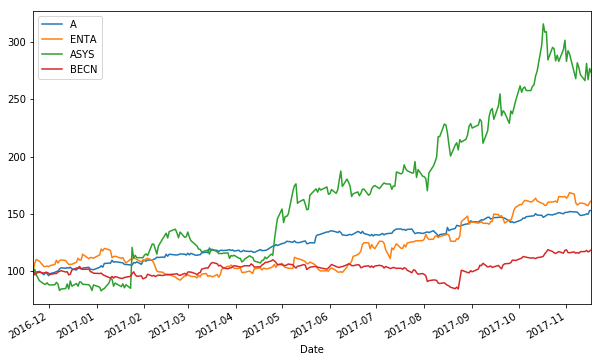

In [7]:
(df / df.ix[0] * 100).plot(figsize=(10,6))

In [8]:
rets = np.log(df / df.shift(1))

In [9]:
df

,A,ENTA,ASYS,BECN
Date,,,,
2016-11-21,44.97,30.07,4.83,46.89
2016-11-22,44.46,32.21,4.91,45.36
2016-11-23,44.65,33.14,4.68,46.08
2016-11-25,44.89,32.69,4.43,46.51
2016-11-28,43.60,31.29,4.29,46.13
2016-11-29,44.48,31.29,4.28,46.43
2016-11-30,43.98,31.44,4.34,46.39
2016-12-01,43.21,31.24,4.26,46.05
2016-12-02,44.03,31.55,4.25,45.56


In [10]:
rets.mean() * 252

A       0.428463
ENTA    0.482276
ASYS    1.012649
BECN    0.172286
dtype: float64

In [11]:
rets.cov() * 252

,A,ENTA,ASYS,BECN
A,0.027333,0.007601,0.001984,0.005220
ENTA,0.007601,0.116734,-0.000383,0.012866
ASYS,0.001984,-0.000383,0.445426,0.010903
BECN,0.005220,0.012866,0.010903,0.057653


In [12]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23425187,  0.36703534,  0.2696651 ,  0.12904769])

In [13]:
np.dot(weights.T, rets.mean()) * 252

0.57268979479256543

In [14]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.05435192327937248

In [15]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.23313498939321073

In [16]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights = weights / np.sum(weights)
    prets.append(np.dot(weights.T, rets.mean() * 252))
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
    
prets = np.array(prets)
pvols = np.array(pvols)

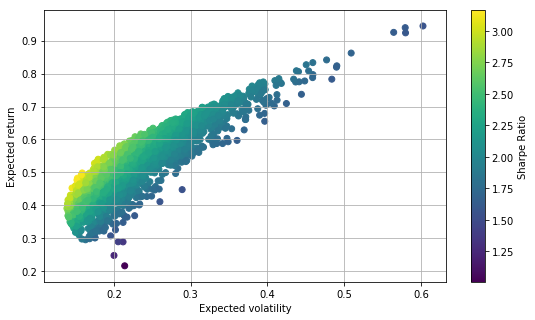

In [17]:
plt.figure(figsize=(9, 5))
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe Ratio')

In [18]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.dot(weights.T, rets.mean() * 252)
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [19]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [20]:
cons = ({'type':'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0,1) for x in range(noa))

In [21]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

Wall time: 38 ms


In [22]:
opts

     fun: -3.1718916127404713
     jac: array([ -2.60174274e-05,   5.69045544e-04,  -1.92224979e-04,
        -1.77299976e-03])
 message: 'Optimization terminated successfully.'
    nfev: 51
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.71197128,  0.15335268,  0.10761962,  0.02705642])

In [23]:
def calc_weights(BP, xs, df):
    t = BP / np.dot(df.tail(1), xs)
    out = zip(symbols, t * xs)
    out = sorted(out, key=lambda tup: tup[1], reverse=True)
    return out

In [24]:
out = calc_weights(460.00, opts.x, df)
print out
print [sym[0] for sym in out if sym[1] > 0.00001]

[(u'A', 5.5189872205620905), (u'ENTA', 1.1887438699793293), (u'ASYS', 0.83423494683044452), (u'BECN', 0.20973319391413162)]
[u'A', u'ENTA', u'ASYS', u'BECN']


In [25]:
df.tail(1)

,A,ENTA,ASYS,BECN
Date,,,,
2017-11-17,68.79,48.52,13.19,55.63
